## Importing Required Libraries

In [78]:
import pandas as pd
import numpy as np
from skimage.feature import graycomatrix, graycoprops
from skimage import io, color, img_as_ubyte
import os
import cv2

In [79]:
df = pd.DataFrame(
    columns=[
        "Contrast Feature",
        "Dissimilarity Feature",
        "Homogeneity Feature",
        "Energy Feature",
        "Correlation Feature",
        "ASM Feature",
        "Mean Feature",
        "Variance Feature",
        "Standard Deviation Feature",
        "RMS Feature"
    ]
)

In [80]:
matrix1 = []

### Matrix

In [81]:
list_of_images = []
name_of_images = []
for i in range(1,4):
    path_of_images = f"/kaggle/input/skin-cancer/imgs_part_{i}/imgs_part_{i}"
    images = os.listdir(path_of_images)
    name_of_images.extend(images)
    list_of_images.extend([os.path.join(path_of_images, img) for img in images])
    
for image in list_of_images:
    img = cv2.imread(image)
    gray = color.rgb2gray(img)
    image = img_as_ubyte(gray)  # Becomes 8-bit unsigned integer

    # This step is similar to data compression, because the 8-bit image contains 256 gray levels, which will cause the calculation of the gray level co-occurrence matrix to be too large, so it is compressed into 16 levels and the gray levels are divided
    bins = np.array(
        [0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 255]
    )  # 16-bit
    inds = np.digitize(
        image, bins
    )  # Returns a matrix with the same size as the image, but the matrix element represents the interval position of the element in the image in the bins, less than 0 is 0, 0-16 is 1, and so on

    max_value = inds.max() + 1
    matrix_coocurrence = graycomatrix(
        inds,  # Numpy matrix for co-occurrence matrix calculation
        [1],  # Step
        [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4],  # Direction angle
        levels=max_value,  # Co-occurrence matrix order
        normed=False,
        symmetric=False,
    )
    # P[i,j,d,theta] returns a four-dimensional matrix, each dimension represents a different meaning
    matrix1.append(matrix_coocurrence)

In [82]:
CF =[]
DF =[]
HF =[]
EF =[]
COR = []
ASM = []
MF, VF, SD ,RMS = [], [], [],[]

# GLCM properties


In [83]:
def contrast_feature(matrix):
    return np.mean(graycoprops(matrix, 'contrast'))

def dissimilarity_feature(matrix):
    return np.mean(graycoprops(matrix, 'dissimilarity'))

def homogeneity_feature(matrix):
    return np.mean(graycoprops(matrix, 'homogeneity'))

def energy_feature(matrix):
    return np.mean(graycoprops(matrix, 'energy'))

def correlation_feature(matrix):
    return np.mean(graycoprops(matrix, 'correlation'))

def asm_feature(matrix):
    return np.mean(graycoprops(matrix, 'ASM'))
    
def mean_feature(matrix):
    return np.mean(matrix)

def variance_feature(matrix):
    return np.var(matrix)

def sd_feature(matrix):
    return np.std(matrix)
    
def rms_feature(matrix):
    return np.sqrt(np.mean(np.square(matrix)))
    
for matrix in matrix1:
    CF.append(contrast_feature(matrix))
    DF.append(dissimilarity_feature(matrix))
    HF.append(homogeneity_feature(matrix))
    EF.append(energy_feature(matrix))
    COR.append(correlation_feature(matrix))
    ASM.append(asm_feature(matrix))
    MF.append(mean_feature(matrix))
    VF.append(variance_feature(matrix))
    SD.append(sd_feature(matrix))
    RMS.append(rms_feature(matrix))

In [84]:
df["Contrast Feature"] = CF
df["Dissimilarity Feature"] = DF
df["Homogeneity Feature"] = HF
df["Energy Feature"] = EF
df["Correlation Feature"] = COR
df["ASM Feature"] = ASM
df["Mean Feature"] = MF
df["Variance Feature"] = VF
df["Standard Deviation Feature"] = SD
df["RMS Feature"] = RMS


In [85]:
df.index = name_of_images
df.index.name = "img_id"

In [86]:
df

,Contrast Feature,Dissimilarity Feature,Homogeneity Feature,Energy Feature,Correlation Feature,ASM Feature,Mean Feature,Variance Feature,Standard Deviation Feature,RMS Feature
img_id,,,,,,,,,,
PAT_492_937_958.png,0.164506,0.125747,0.940552,0.421009,0.969356,0.177292,6473.543210,2.365378e+09,48635.150801,7807.683949
PAT_13_21_350.png,0.140483,0.136070,0.932391,0.370503,0.976124,0.137326,4694.883136,4.895300e+08,22125.325771,9267.542269
PAT_456_887_499.png,0.162921,0.162699,0.918672,0.443865,0.920602,0.197050,2487.515306,2.328027e+08,15257.874258,6463.170524
PAT_15_1001_749.png,0.409445,0.334858,0.839908,0.365902,0.904654,0.134018,385.428201,5.606193e+06,2367.740112,2398.905612
PAT_456_888_961.png,0.331169,0.287508,0.860554,0.395208,0.867618,0.156368,2335.607422,2.129254e+08,14591.963476,5816.449441
...,...,...,...,...,...,...,...,...,...,...
PAT_1547_4231_928.png,0.209034,0.193727,0.904638,0.339363,0.964105,0.115229,2192.873047,1.370494e+08,11706.811477,6418.319963
PAT_1586_2624_615.png,0.198947,0.193567,0.903754,0.373707,0.953819,0.139728,461.272727,3.385286e+06,1839.914808,1896.855036
PAT_1312_1102_578.png,0.094519,0.089269,0.955808,0.463457,0.976365,0.214830,3608.337963,8.932632e+08,29887.509328,6428.423222


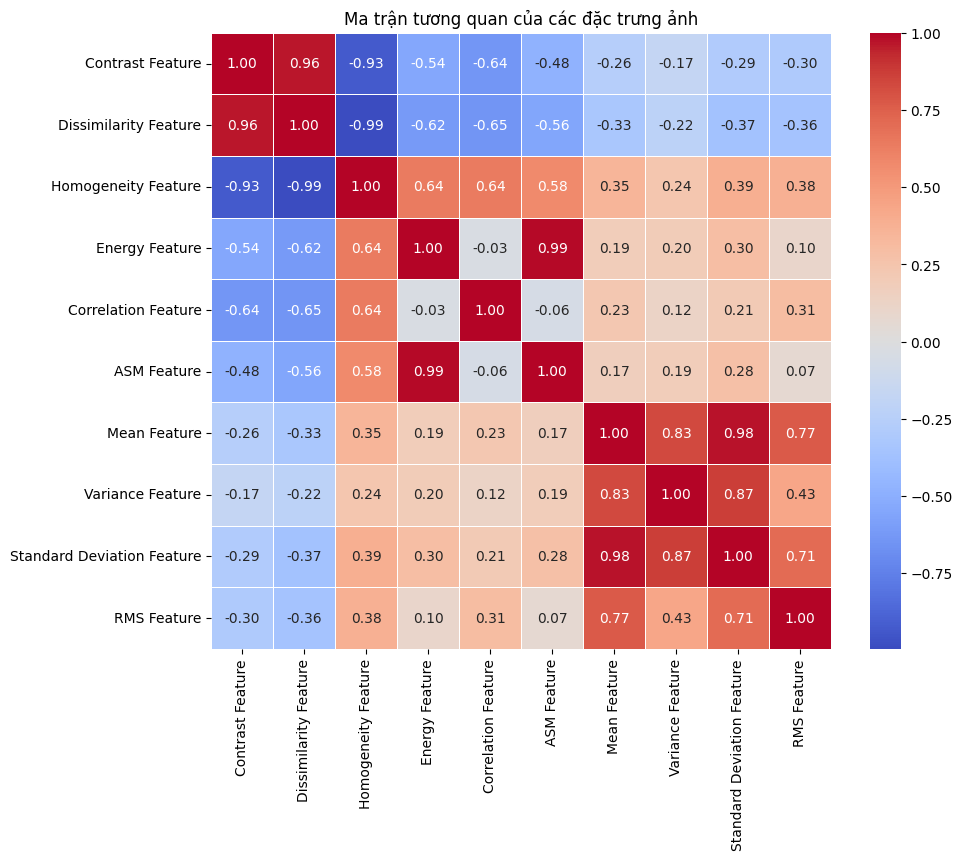

In [87]:
df.to_csv("Feature Extraction.csv")
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Ma trận tương quan của các đặc trưng ảnh")
plt.show()

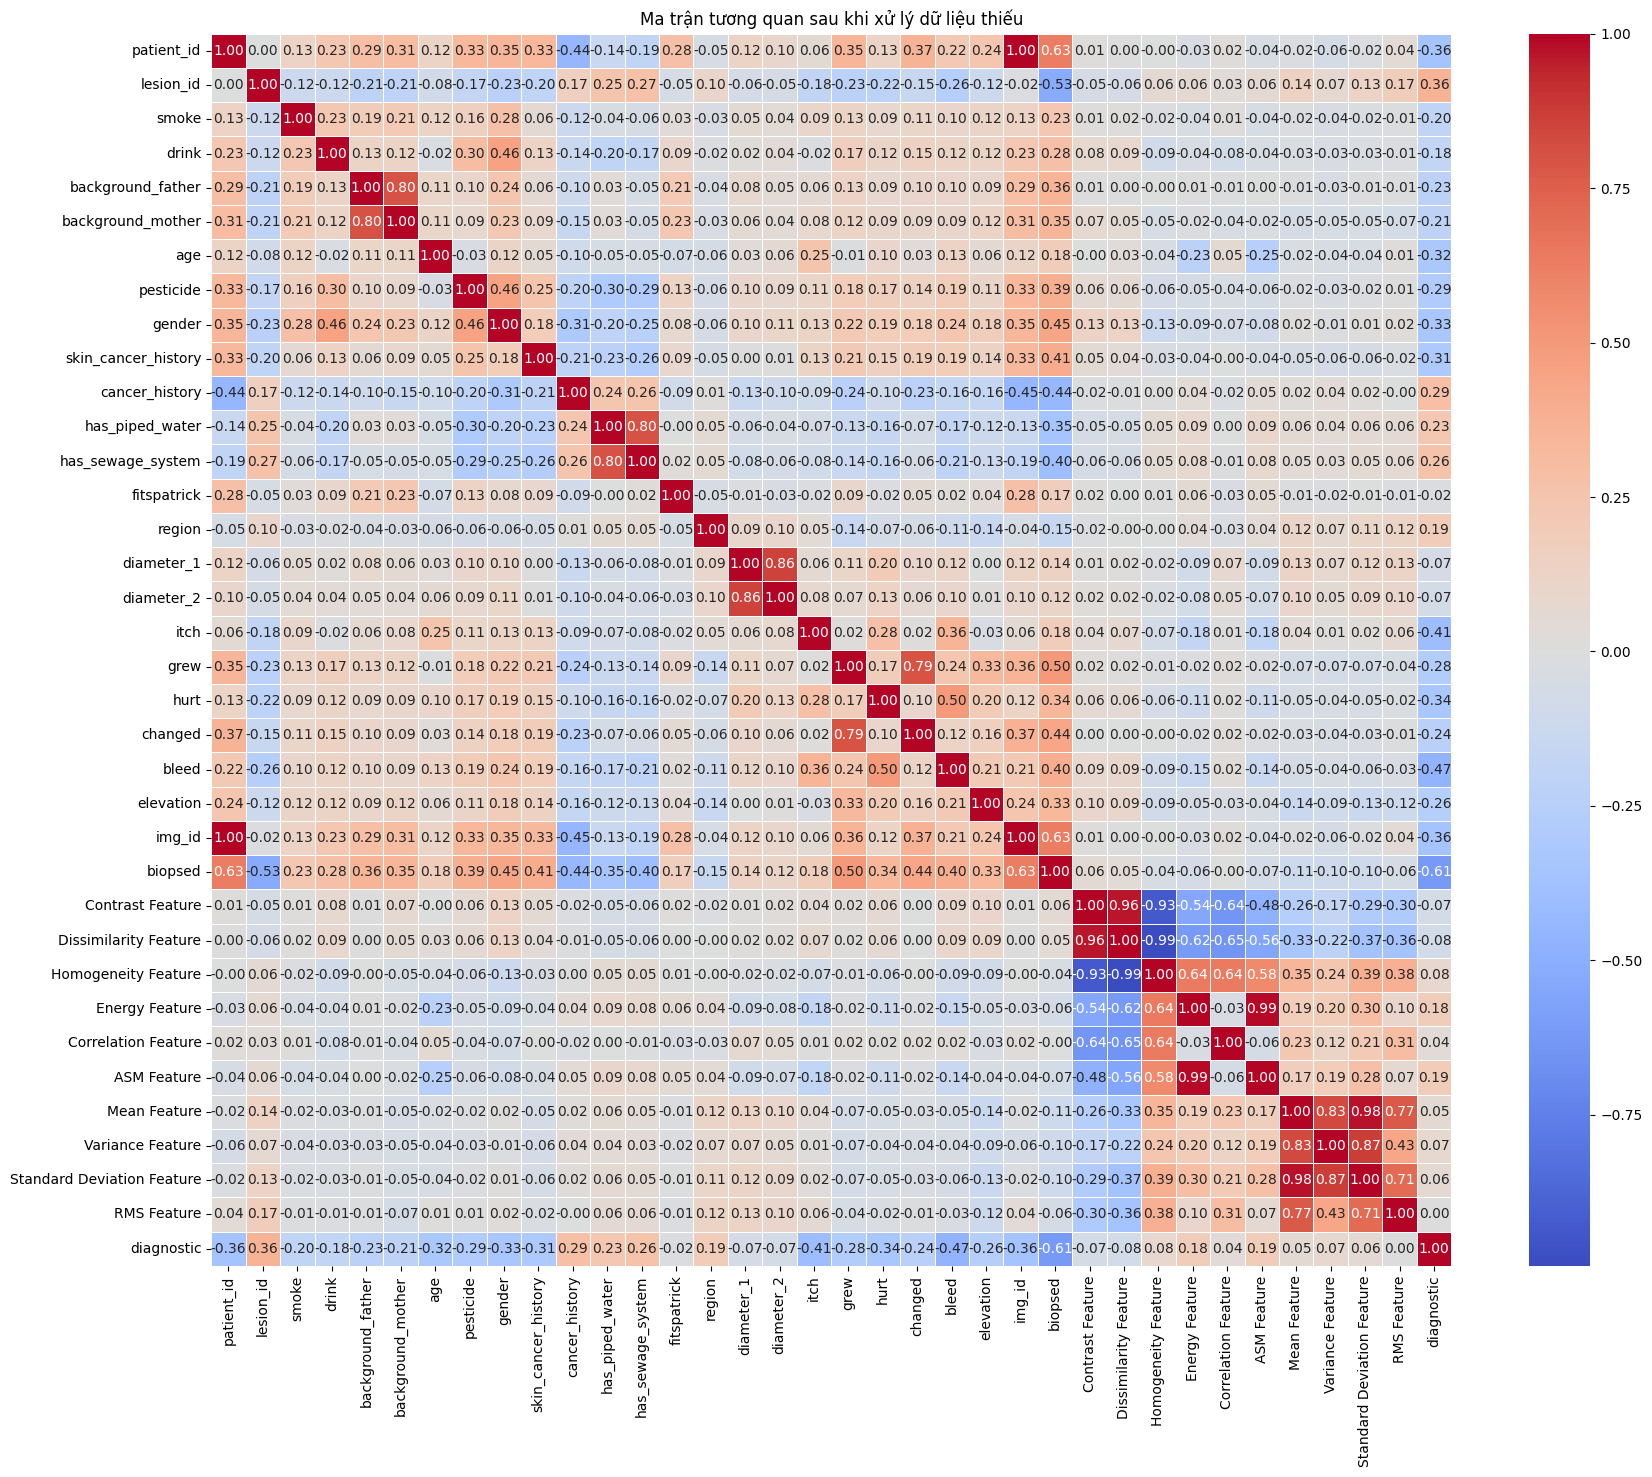

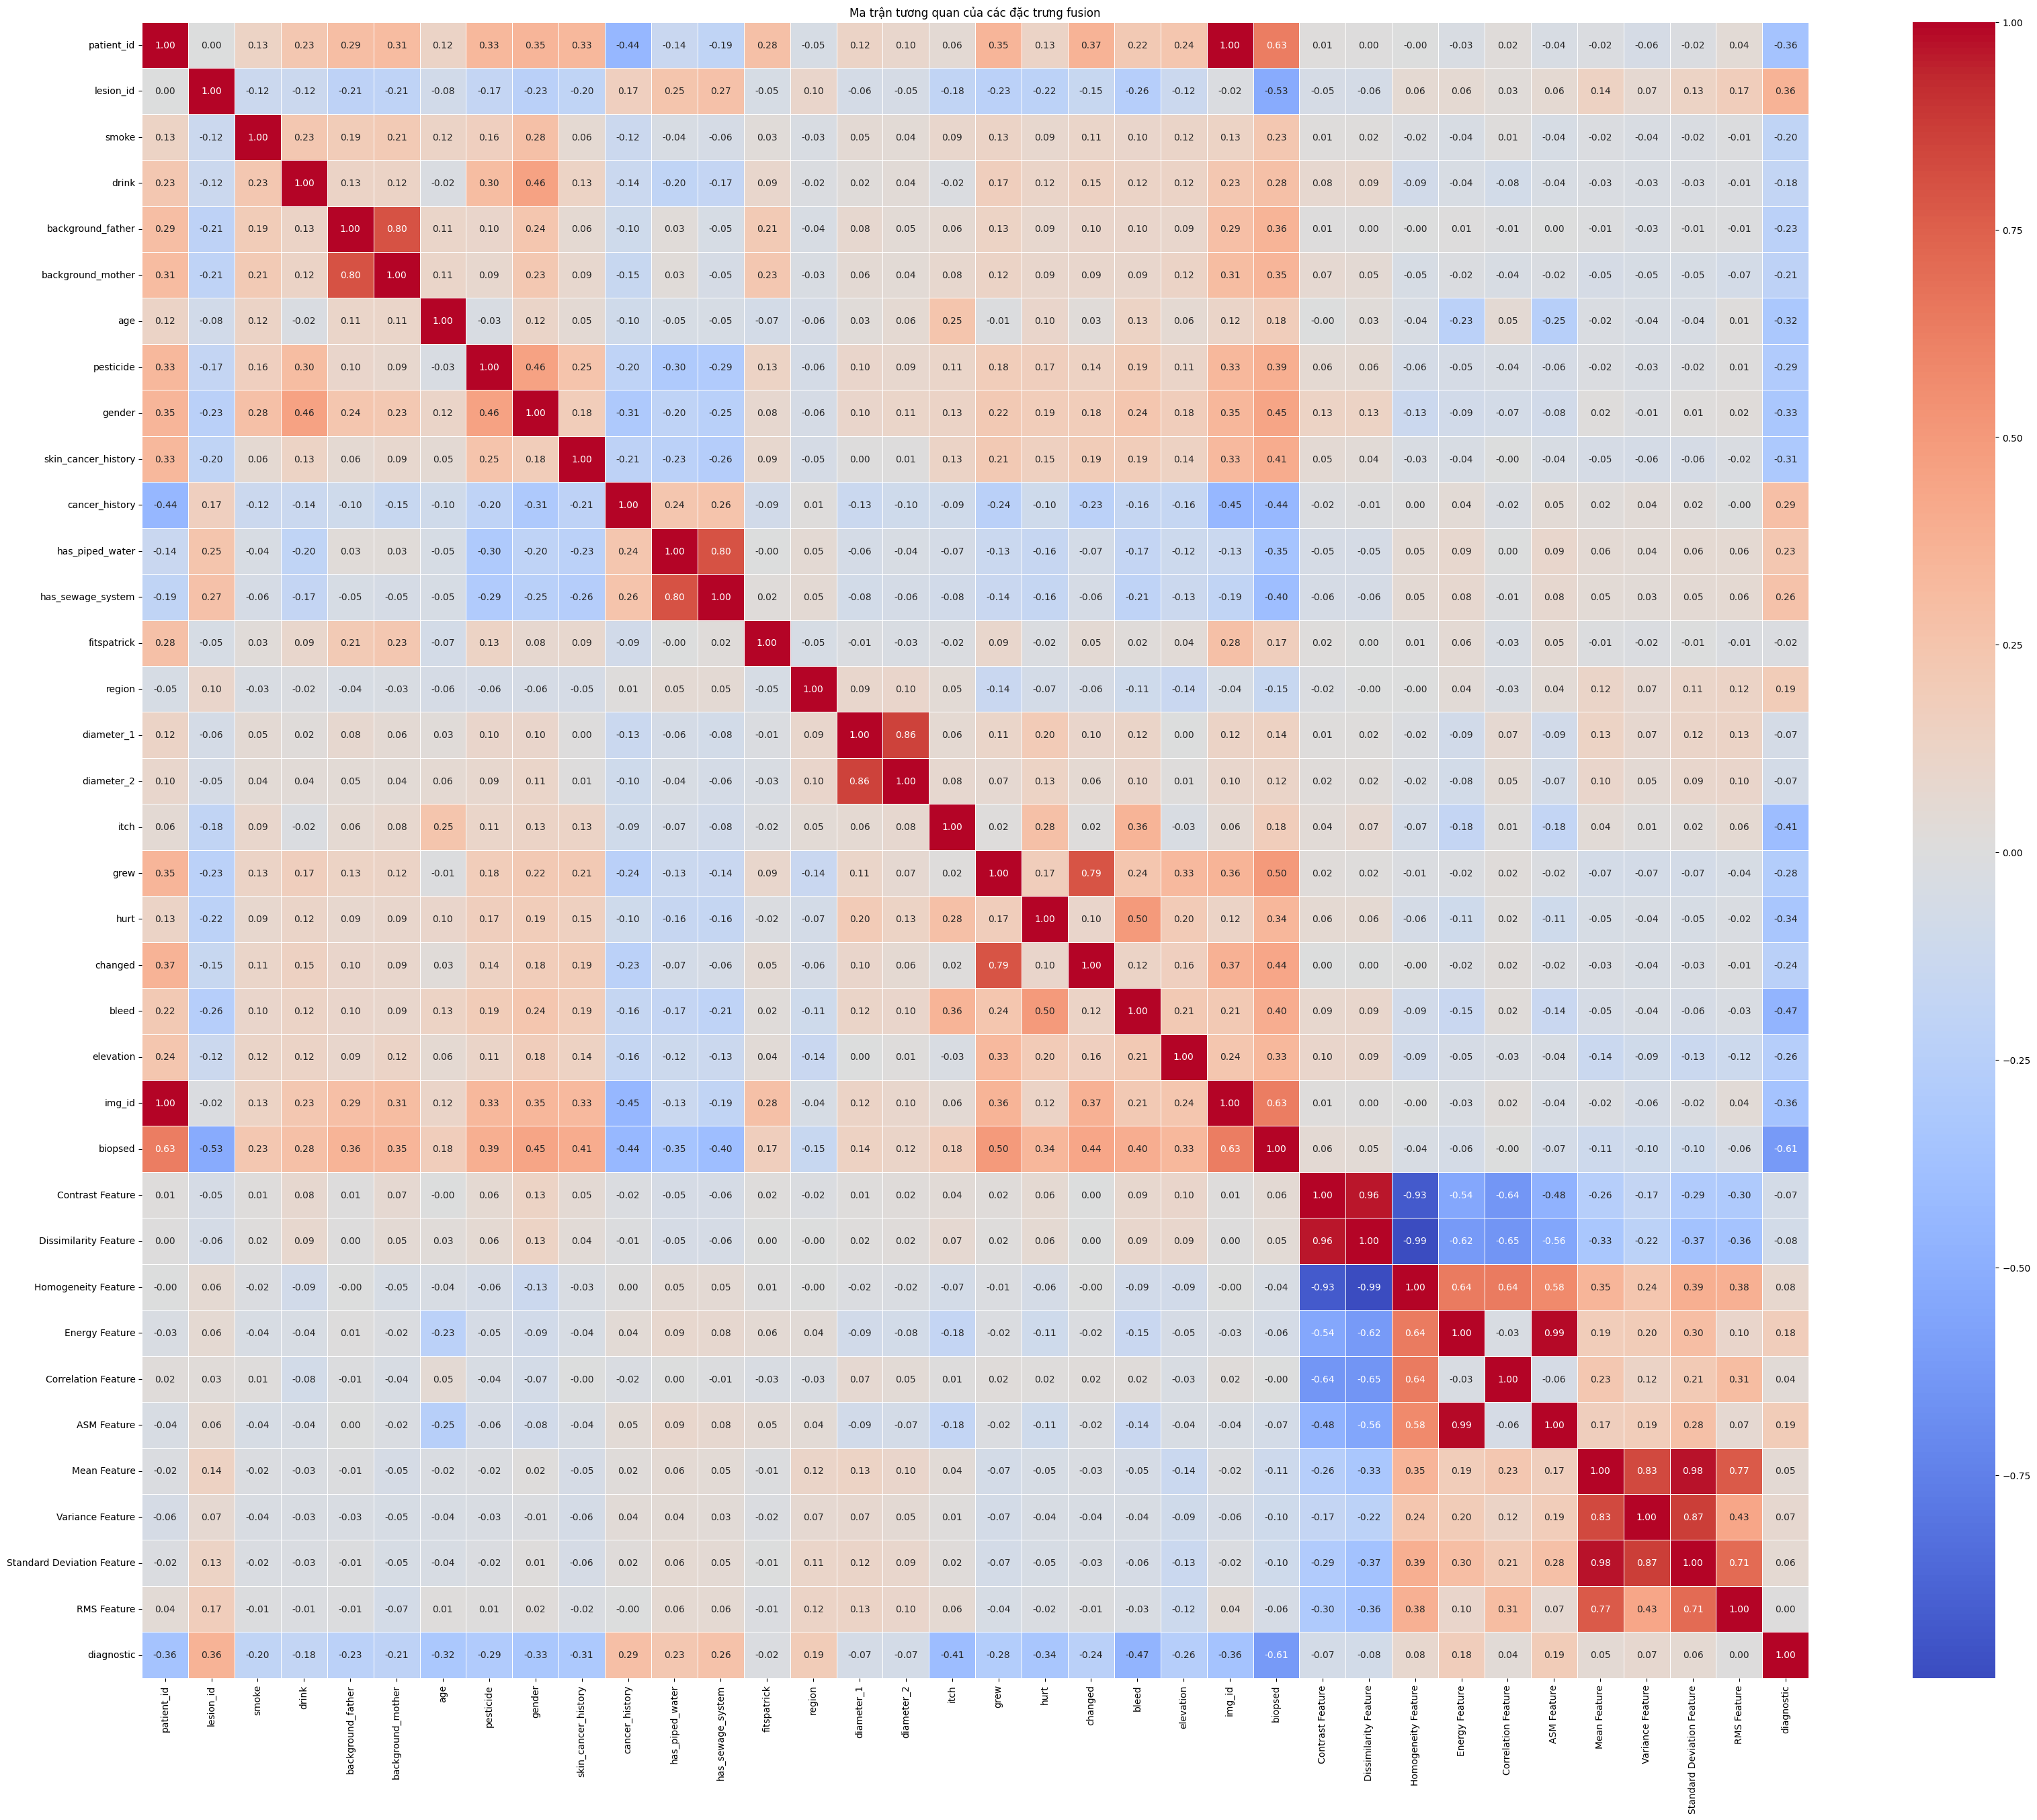

In [88]:
dfMetaData = pd.read_csv("/kaggle/input/skin-cancer/metadata.csv")
dfMerge = pd.merge(dfMetaData, df, on='img_id', how='inner')
columns = [col for col in dfMerge.columns if col != 'diagnostic']
dfMerge = dfMerge[columns + ['diagnostic']]
label_mapping = {
    # Bệnh lý
    "BCC": 1, "SCC": 2, "ACK": 3, "SEK": 4, "NEV": 5, "MEL": 6,
    
    # Giới tính
    "FEMALE": 0, "MALE": 1,

    # Giá trị Boolean
    "FALSE": 0, "TRUE": 1, "UNK": 3,

    # Châu Âu
    "POMERANIA": 1, "GERMANY": 2, "NETHERLANDS": 3, "ITALY": 4, "POLAND": 5,
    "PORTUGAL": 6, "CZECH": 7, "NORWAY": 8, "SPAIN": 9, "AUSTRIA": 10, "FRANCE": 11,

    # Châu Mỹ
    "BRAZIL": 12,

    # Châu Á
    "ISRAEL": 13,

    # Vùng cơ thể - Đầu
    "FACE": 1, "SCALP": 2, "NOSE": 3, "EAR": 4, "LIP": 5,

    # Vùng cổ và thân trên
    "NECK": 6, "CHEST": 7, "BACK": 8, "ABDOMEN": 9,

    # Vùng tay
    "ARM": 10, "FOREARM": 11, "HAND": 12,

    # Vùng chân
    "THIGH": 13, "FOOT": 14
} 
numerical_cols = dfMerge.select_dtypes(include=['number']).columns
categorical_cols = dfMerge.select_dtypes(include=['object', 'bool']).columns

for col in categorical_cols:
    dfMerge[col] = dfMerge[col].map(label_mapping).fillna(dfMerge[col])
    
for col in numerical_cols:
    dfMerge[col].fillna(dfMerge[col].median(), inplace=True)

for col in categorical_cols:
    dfMerge[col].fillna(dfMerge[col].mode()[0], inplace=True)

for col in categorical_cols:
    dfMerge[col] = dfMerge[col].astype('category').cat.codes

corr_matrix = dfMerge.corr()
df = pd.DataFrame(corr_matrix)
df.to_csv("correlation_matrix.csv", index=False)
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Ma trận tương quan sau khi xử lý dữ liệu thiếu")
plt.show()




dfMerge.to_csv("Result.csv", index=False)

corr_matrix = dfMerge.corr()
plt.figure(figsize=(40, 32))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Ma trận tương quan của các đặc trưng fusion")
plt.show()